# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [101]:
import warnings
warnings.filterwarnings("ignore")

In [102]:
df = pd.read_csv('previsao_de_renda.csv')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [104]:
# 1

# Separar a variável resposta (y) e as variáveis explicativas (X)
X = df.drop(columns=['renda'])  # Substitua 'renda' pelo nome da variável dependente
y = df['renda']

# Dividir a base de dados em 75% para treinamento e 25% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Exibir o tamanho dos conjuntos de treinamento e teste
print(f"Tamanho do conjunto de treinamento: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treinamento: (11250, 14)
Tamanho do conjunto de teste: (3750, 14)


In [105]:
# 2

# Remover a coluna 'data_ref' e outras não numéricas que não foram transformadas
X = df.drop(columns=['renda', 'data_ref', 'id_cliente'])  # Remover 'renda' para prever
y = np.log(df['renda'])  # Transformar renda em log

# Garantir que todas as colunas categóricas estão codificadas como dummies
X = pd.get_dummies(X, drop_first=True)

# Tratar valores ausentes (NaN)
X.fillna(X.median(), inplace=True)  # Preencher NaNs com a mediana das colunas numéricas

# Separar os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Lista de alphas a serem avaliados
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

# Iterar sobre cada valor de alpha
for alpha in alphas:
    # Instanciar o modelo de Ridge
    modelo_ridge = Ridge(alpha=alpha)
    
    # Ajustar o modelo com os dados de treinamento
    modelo_ridge.fit(X_train, y_train)
    
    # Fazer previsões na base de teste
    y_pred = modelo_ridge.predict(X_test)
    
    # Avaliar o R²
    r2 = r2_score(y_test, y_pred)
    
    # Exibir o valor de R² para o alpha correspondente
    print(f"R² para alpha = {alpha}: {r2:.4f}")

R² para alpha = 0: 0.3509
R² para alpha = 0.001: 0.3509
R² para alpha = 0.005: 0.3509
R² para alpha = 0.01: 0.3509
R² para alpha = 0.05: 0.3509
R² para alpha = 0.1: 0.3509


### Sobre os resultados acima:

- Observamos que todos os resultados deram exatamente iguais, ou seja, não há um melhor ou pior nesse cenário

In [106]:
# 3

# Lista de alphas a serem avaliados para o Lasso
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

# Iterar sobre cada valor de alpha
for alpha in alphas:
    # Instanciar o modelo de Lasso
    modelo_lasso = Lasso(alpha=alpha)
    
    # Ajustar o modelo com os dados de treinamento
    modelo_lasso.fit(X_train, y_train)
    
    # Fazer previsões na base de teste
    y_pred = modelo_lasso.predict(X_test)
    
    # Avaliar o R²
    r2 = r2_score(y_test, y_pred)
    
    # Exibir o valor de R² para o alpha correspondente
    print(f"R² para alpha = {alpha}: {r2:.4f}")

R² para alpha = 0: 0.3509
R² para alpha = 0.001: 0.3514
R² para alpha = 0.005: 0.3502
R² para alpha = 0.01: 0.3477
R² para alpha = 0.05: 0.3213
R² para alpha = 0.1: 0.2724


### Sobre os resultados acima:

- Alpha = 0: Neste caso, o modelo é equivalente à regressão linear simples (sem regularização), já que Lasso sem regularização se comporta como uma regressão linear padrão. O R² é 0.3509.

- Alpha = 0.001: Um leve aumento no R² (0.3514), o que sugere que uma pequena regularização melhora o ajuste.

- Alpha = 0.005: O R² começa a cair ligeiramente para 0.3502, o que indica que a regularização está começando a penalizar demais.

- Alpha = 0.01: O R² cai para 0.3477, indicando que mais regularização continua a reduzir o desempenho.

- Alpha = 0.05 e Alpha = 0.1: O desempenho cai significativamente (R² 0.3213 e 0.2724), mostrando que a regularização está removendo variáveis importantes do modelo, prejudicando a capacidade preditiva.

- O melhor desempenho foi com alpha = 0.001, onde o R² foi 0.3514.

- À medida que o valor de alpha aumenta, a regularização aumenta, e o R² diminui, o que sugere que o modelo começa a simplificar demais, removendo variáveis relevantes para a previsão.

- E por fim, mas não menos importante, o resultado do valor de alpha = 0.001  onde o R² foi 0.3514, também é melhor em relação ao exercício anterior.

In [107]:
# 4

# Instanciar o modelo de regressão linear
modelo_linear = LinearRegression()

# Realizar Stepwise usando a técnica de seleção sequencial
stepwise = SequentialFeatureSelector(modelo_linear, 
                                     n_features_to_select='auto', 
                                     direction='forward',  # Stepwise Forward
                                     scoring='r2', 
                                     cv=5)  # Cross-validation com 5 folds

# Ajustar o seletor aos dados de treinamento
stepwise.fit(X_train, y_train)

# Selecionar as variáveis escolhidas pelo processo stepwise
X_train_selected = stepwise.transform(X_train)
X_test_selected = stepwise.transform(X_test)

# Ajustar o modelo linear com as variáveis selecionadas
modelo_stepwise = LinearRegression()
modelo_stepwise.fit(X_train_selected, y_train)

# Fazer previsões na base de teste
y_pred = modelo_stepwise.predict(X_test_selected)

# Avaliar o R² na base de teste
r2_stepwise = r2_score(y_test, y_pred)
print(f"R² na base de teste após Stepwise: {r2_stepwise:.4f}")

R² na base de teste após Stepwise: 0.3517


# 5:

- Após visualizar o R² na base de **teste após Stepwise**, percebemos que esse é o melhor resultado até agora com o **valor de 0.3517**

In [108]:
# 6

# Para tentar melhorar o R2, irei implementar alguns métodos

# Feature Engineering
X_train['idade_log'] = np.log(X_train['idade'] + 1)
X_train['tempo_emprego_log'] = np.log(X_train['tempo_emprego'] + 1)
X_test['idade_log'] = np.log(X_test['idade'] + 1)
X_test['tempo_emprego_log'] = np.log(X_test['tempo_emprego'] + 1)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [109]:
# Regularização com Validação Cruzada

lasso_cv = LassoCV(alphas=[0, 0.001, 0.005, 0.01, 0.05, 0.1], cv=5)
lasso_cv.fit(X_train, y_train)
best_alpha = lasso_cv.alpha_

# Avaliar no conjunto de testes
y_pred = lasso_cv.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Melhor alpha: {best_alpha}, R²: {r2:.4f}")

Melhor alpha: 0.001, R²: 0.3519


In [110]:
# Usar Lasso como estimador

lasso = Lasso(alpha=0.001)
rfe = RFE(estimator=lasso, n_features_to_select=10)  # Selecionar as 10 melhores features
rfe.fit(X_train, y_train)

# Avaliar R²
y_pred_rfe = rfe.predict(X_test)
r2_rfe = r2_score(y_test, y_pred_rfe)
print(f"R² após seleção de variáveis: {r2_rfe:.4f}")

R² após seleção de variáveis: 0.3485


In [111]:
# 7

# Definir o modelo
modelo_tree = DecisionTreeRegressor(random_state=0)

# Definir os parâmetros a serem ajustados
parametros = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 4, 8],
    'min_samples_split': [2, 5, 10, 15]
}

# Configurar a busca em grade
grid_search = GridSearchCV(estimator=modelo_tree, param_grid=parametros, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ajustar o modelo
grid_search.fit(X_train, y_train)

# Melhor modelo
melhor_modelo = grid_search.best_estimator_

# Avaliar o melhor modelo na base de teste
y_pred = melhor_modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"Melhor R² obtido: {r2:.4f}")
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Melhor R² obtido: 0.3495
Melhores parâmetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}


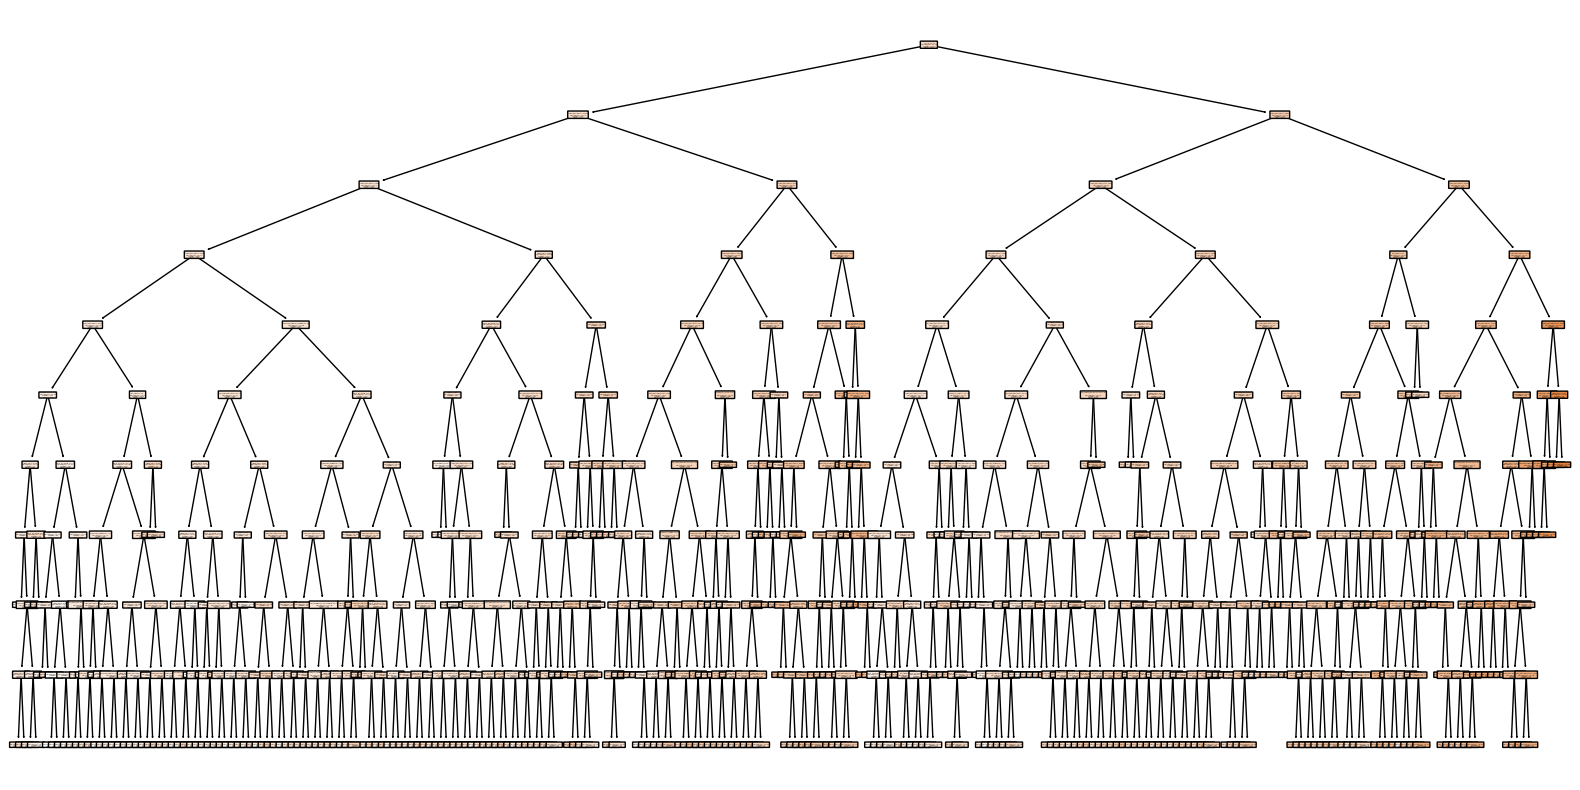

In [112]:
plt.figure(figsize=(20,10))
plot_tree(melhor_modelo, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()

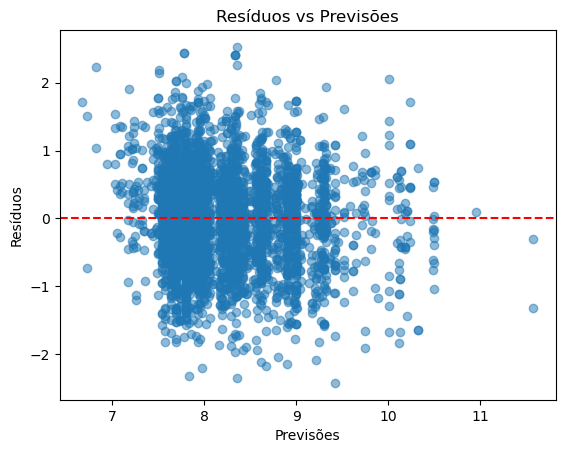

In [113]:
residuos = y_test - y_pred
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Previsões')
plt.show()